<a href="https://colab.research.google.com/github/Tush2203/Data-Analysis/blob/main/_Project_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROJECT
Consider Sales dataset and analyse it in a proper way.
---
- expectation: need a clarity on who is spending more money for shopping incase of gender,age_group,state,Occupation,Product_category,marital_status.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# to load the data
---
- encoding = used to deal with files in different format

In [ ]:
df = pd.read_csv('sales_data.csv',encoding='ISO-8859-1')
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


# to get information

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


# to get description of df

In [ ]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount,Status,unnamed1
count,1.125100e+04,11251.000000,11251.000000,11251.000000,11239.000000,0.0,0.0
mean,1.003004e+06,35.421207,0.420318,2.489290,9453.610858,NaN,NaN
std,1.716125e+03,12.754122,0.493632,1.115047,5222.355869,NaN,NaN
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000,NaN,NaN
25%,1.001492e+06,27.000000,0.000000,1.500000,5443.000000,NaN,NaN
50%,1.003065e+06,33.000000,0.000000,2.000000,8109.000000,NaN,NaN
75%,1.004430e+06,43.000000,1.000000,3.000000,12675.000000,NaN,NaN
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000,NaN,NaN


# data cleaning
---
## Removing columns
---
- status
- unnamed1
- age

In [ ]:
df.drop(['Status','unnamed1','Age'],axis=1,inplace=True)

In [ ]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,1,Gujarat,Western,Food Processing,Auto,2,23877.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Marital_Status    11251 non-null  int64  
 6   State             11251 non-null  object 
 7   Zone              11251 non-null  object 
 8   Occupation        11251 non-null  object 
 9   Product_Category  11251 non-null  object 
 10  Orders            11251 non-null  int64  
 11  Amount            11239 non-null  float64
dtypes: float64(1), int64(3), object(8)
memory usage: 1.0+ MB


#  changing data from F to Female and M to Male

In [ ]:
df['Gender'] = df['Gender'].map({'F':'Female','M':'Male'})

In [ ]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,Female,26-35,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,Female,26-35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,Female,26-35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,Male,0-17,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,Male,26-35,1,Gujarat,Western,Food Processing,Auto,2,23877.0


# Marital_Status -
- 0 = 'Unmarried'
- 1 = 'Married'

In [ ]:
df['Marital_Status'] = df['Marital_Status'].map({0:'Unmarried',1:'Married'})

In [ ]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,Female,26-35,Unmarried,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,Female,26-35,Married,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,Female,26-35,Married,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,Male,0-17,Unmarried,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,Male,26-35,Married,Gujarat,Western,Food Processing,Auto,2,23877.0


# Removing unwanted row

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11239 entries, 0 to 11250
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11239 non-null  int64  
 1   Cust_name         11239 non-null  object 
 2   Product_ID        11239 non-null  object 
 3   Gender            11239 non-null  object 
 4   Age Group         11239 non-null  object 
 5   Marital_Status    11239 non-null  object 
 6   State             11239 non-null  object 
 7   Zone              11239 non-null  object 
 8   Occupation        11239 non-null  object 
 9   Product_Category  11239 non-null  object 
 10  Orders            11239 non-null  int64  
 11  Amount            11239 non-null  float64
dtypes: float64(1), int64(2), object(9)
memory usage: 1.1+ MB


# Data Visualization

In [ ]:
df['Gender'].value_counts()

,count
Gender,
Female,7832
Male,3407


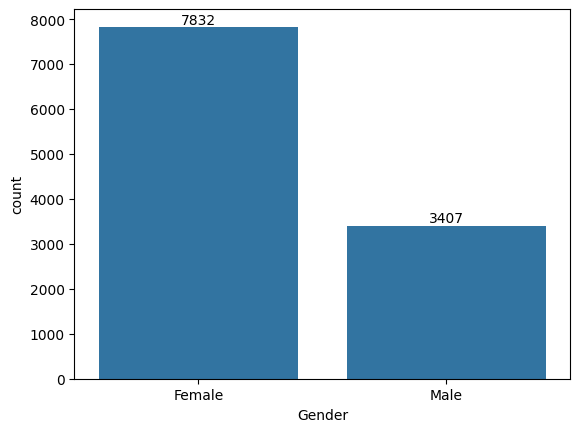

In [ ]:
a = sns.countplot(x='Gender',data=df)
for i in a.containers:
  a.bar_label(i)

In [ ]:
gen = df.groupby('Gender')['Amount'].sum()
gen

,Amount
Gender,
Female,74335856.43
Male,31913276.00


In [ ]:
df1 = pd.DataFrame(gen)

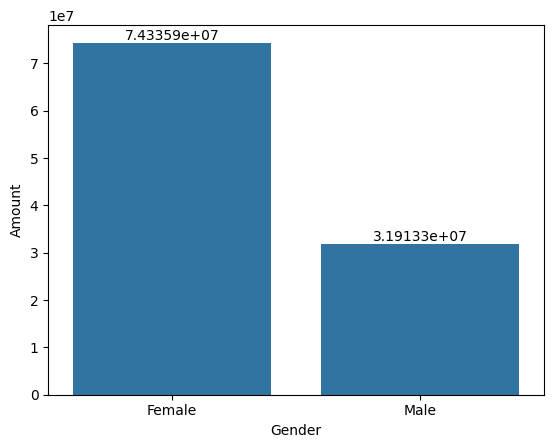

In [ ]:
a = sns.barplot(x='Gender',y='Amount',data=df1)
for i in a.containers:
  a.bar_label(i)

# For Age Group

In [ ]:
df['Age Group'].value_counts()

,count
Age Group,
26-35,4541
36-45,2283
18-25,1879
46-50,983
51-55,830
55+,427
0-17,296


In [ ]:
ag =df.groupby('Age Group')['Amount'].sum()
ag

,Amount
Age Group,
0-17,2699653.00
18-25,17240732.00
26-35,42613443.94
36-45,22144995.49
46-50,9207844.00
51-55,8261477.00
55+,4080987.00


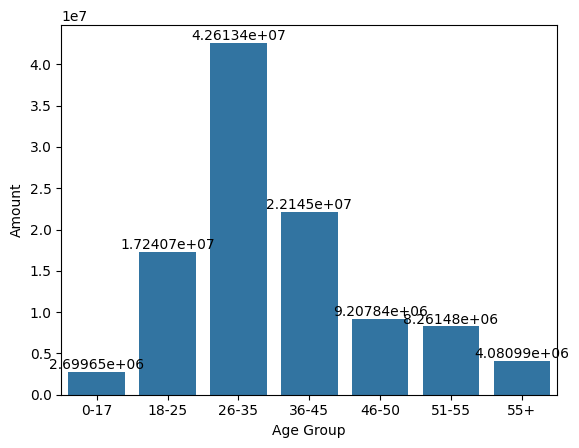

In [ ]:
df2 = pd.DataFrame(ag)
b = sns.barplot(x='Age Group',y ='Amount',data = df2)
for i in b.containers:
  b.bar_label(i)